## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.874001 -0.120600  1.340319 -0.413849 -1.626375  0.407406
1 -0.273189  1.669557  1.450041  0.642474  0.975024  2.102015
2 -0.880014 -0.812150 -0.799508  1.518541  0.734265  0.260927
3 -1.406169 -0.718932  0.176735 -1.077163  0.119361 -1.827872
4  1.044185  1.533051 -0.461922  0.743133  1.775294  0.924915


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9924412	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9833592	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9741146	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9649132	total: 59ms	remaining: 14.7s
4:	learn: 0.9576168	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9481123	total: 60.4ms	remaining: 10s
6:	learn: 0.9387584	total: 61.1ms	remaining: 8.66s
7:	learn: 0.9292126	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9214023	total: 62.2ms	remaining: 6.85s
9:	learn: 0.9144962	total: 63ms	remaining: 6.23s
10:	learn: 0.9075071	total: 63.8ms	remaining: 5.73s
11:	learn: 0.8989084	total: 64.4ms	remaining: 5.3s
12:	learn: 0.8908946	total: 65ms	remaining: 4.93s
13:	learn: 0.8839759	total: 65.5ms	remaining: 4.61s
14:	learn: 0.8766058	total: 66ms	remaining: 4.33s
15:	learn: 0.8693184	total: 66.6ms	remaining: 4.09s
16:	learn: 0.8603413	total: 67ms	remaining: 3.88s
17:	learn: 0.8542018	total: 67.5ms	remaining: 3.68s
18:	learn: 0.8471639	total: 68.1ms	remaining: 3.51s
19:	l

94:	learn: 0.4777163	total: 108ms	remaining: 1.02s
95:	learn: 0.4743056	total: 108ms	remaining: 1.02s
96:	learn: 0.4709980	total: 109ms	remaining: 1.01s
97:	learn: 0.4680078	total: 109ms	remaining: 1s
98:	learn: 0.4642146	total: 110ms	remaining: 998ms
99:	learn: 0.4616844	total: 110ms	remaining: 991ms
100:	learn: 0.4587736	total: 111ms	remaining: 984ms
101:	learn: 0.4555329	total: 111ms	remaining: 978ms
102:	learn: 0.4525507	total: 112ms	remaining: 974ms
103:	learn: 0.4495552	total: 112ms	remaining: 968ms
104:	learn: 0.4460333	total: 113ms	remaining: 961ms
105:	learn: 0.4429455	total: 113ms	remaining: 954ms
106:	learn: 0.4399681	total: 114ms	remaining: 949ms
107:	learn: 0.4373899	total: 114ms	remaining: 943ms
108:	learn: 0.4346554	total: 115ms	remaining: 938ms
109:	learn: 0.4318639	total: 115ms	remaining: 932ms
110:	learn: 0.4287223	total: 116ms	remaining: 927ms
111:	learn: 0.4254642	total: 116ms	remaining: 921ms
112:	learn: 0.4226395	total: 117ms	remaining: 915ms
113:	learn: 0.4193784

247:	learn: 0.1784239	total: 187ms	remaining: 568ms
248:	learn: 0.1770616	total: 188ms	remaining: 567ms
249:	learn: 0.1758515	total: 188ms	remaining: 565ms
250:	learn: 0.1750300	total: 189ms	remaining: 563ms
251:	learn: 0.1739867	total: 189ms	remaining: 562ms
252:	learn: 0.1730168	total: 190ms	remaining: 561ms
253:	learn: 0.1718580	total: 190ms	remaining: 559ms
254:	learn: 0.1708390	total: 191ms	remaining: 558ms
255:	learn: 0.1696685	total: 191ms	remaining: 556ms
256:	learn: 0.1684789	total: 192ms	remaining: 555ms
257:	learn: 0.1675972	total: 192ms	remaining: 554ms
258:	learn: 0.1671789	total: 193ms	remaining: 552ms
259:	learn: 0.1660093	total: 193ms	remaining: 551ms
260:	learn: 0.1649389	total: 194ms	remaining: 549ms
261:	learn: 0.1641763	total: 195ms	remaining: 548ms
262:	learn: 0.1631679	total: 195ms	remaining: 547ms
263:	learn: 0.1624465	total: 196ms	remaining: 545ms
264:	learn: 0.1613868	total: 196ms	remaining: 544ms
265:	learn: 0.1604723	total: 196ms	remaining: 542ms
266:	learn: 

441:	learn: 0.0665076	total: 292ms	remaining: 369ms
442:	learn: 0.0664014	total: 293ms	remaining: 368ms
443:	learn: 0.0659767	total: 293ms	remaining: 367ms
444:	learn: 0.0658720	total: 294ms	remaining: 366ms
445:	learn: 0.0652948	total: 294ms	remaining: 365ms
446:	learn: 0.0649257	total: 295ms	remaining: 365ms
447:	learn: 0.0645937	total: 295ms	remaining: 364ms
448:	learn: 0.0642341	total: 296ms	remaining: 363ms
449:	learn: 0.0641268	total: 296ms	remaining: 362ms
450:	learn: 0.0640210	total: 297ms	remaining: 361ms
451:	learn: 0.0636940	total: 298ms	remaining: 361ms
452:	learn: 0.0635901	total: 298ms	remaining: 360ms
453:	learn: 0.0632714	total: 299ms	remaining: 359ms
454:	learn: 0.0629543	total: 299ms	remaining: 358ms
455:	learn: 0.0626357	total: 300ms	remaining: 357ms
456:	learn: 0.0623276	total: 300ms	remaining: 356ms
457:	learn: 0.0622276	total: 301ms	remaining: 356ms
458:	learn: 0.0618418	total: 301ms	remaining: 355ms
459:	learn: 0.0613130	total: 302ms	remaining: 354ms
460:	learn: 

591:	learn: 0.0387476	total: 372ms	remaining: 256ms
592:	learn: 0.0384400	total: 372ms	remaining: 256ms
593:	learn: 0.0382424	total: 373ms	remaining: 255ms
594:	learn: 0.0381939	total: 374ms	remaining: 254ms
595:	learn: 0.0381460	total: 374ms	remaining: 254ms
596:	learn: 0.0381060	total: 375ms	remaining: 253ms
597:	learn: 0.0378810	total: 375ms	remaining: 252ms
598:	learn: 0.0377073	total: 376ms	remaining: 252ms
599:	learn: 0.0375436	total: 376ms	remaining: 251ms
600:	learn: 0.0373666	total: 377ms	remaining: 250ms
601:	learn: 0.0371981	total: 377ms	remaining: 250ms
602:	learn: 0.0370240	total: 378ms	remaining: 249ms
603:	learn: 0.0368094	total: 379ms	remaining: 248ms
604:	learn: 0.0366436	total: 379ms	remaining: 248ms
605:	learn: 0.0364492	total: 380ms	remaining: 247ms
606:	learn: 0.0362655	total: 380ms	remaining: 246ms
607:	learn: 0.0362258	total: 381ms	remaining: 246ms
608:	learn: 0.0360723	total: 381ms	remaining: 245ms
609:	learn: 0.0359125	total: 382ms	remaining: 244ms
610:	learn: 

787:	learn: 0.0193829	total: 477ms	remaining: 128ms
788:	learn: 0.0193272	total: 477ms	remaining: 128ms
789:	learn: 0.0193137	total: 478ms	remaining: 127ms
790:	learn: 0.0192482	total: 478ms	remaining: 126ms
791:	learn: 0.0191447	total: 479ms	remaining: 126ms
792:	learn: 0.0190865	total: 479ms	remaining: 125ms
793:	learn: 0.0189906	total: 479ms	remaining: 124ms
794:	learn: 0.0189001	total: 480ms	remaining: 124ms
795:	learn: 0.0188000	total: 480ms	remaining: 123ms
796:	learn: 0.0187859	total: 481ms	remaining: 122ms
797:	learn: 0.0186932	total: 481ms	remaining: 122ms
798:	learn: 0.0186323	total: 482ms	remaining: 121ms
799:	learn: 0.0185624	total: 482ms	remaining: 121ms
800:	learn: 0.0184964	total: 483ms	remaining: 120ms
801:	learn: 0.0184065	total: 483ms	remaining: 119ms
802:	learn: 0.0183459	total: 484ms	remaining: 119ms
803:	learn: 0.0182854	total: 484ms	remaining: 118ms
804:	learn: 0.0182277	total: 485ms	remaining: 117ms
805:	learn: 0.0181643	total: 485ms	remaining: 117ms
806:	learn: 

937:	learn: 0.0107408	total: 556ms	remaining: 36.7ms
938:	learn: 0.0106717	total: 556ms	remaining: 36.1ms
939:	learn: 0.0106197	total: 557ms	remaining: 35.5ms
940:	learn: 0.0106012	total: 557ms	remaining: 34.9ms
941:	learn: 0.0105838	total: 558ms	remaining: 34.3ms
942:	learn: 0.0105674	total: 558ms	remaining: 33.7ms
943:	learn: 0.0105174	total: 559ms	remaining: 33.1ms
944:	learn: 0.0105013	total: 559ms	remaining: 32.5ms
945:	learn: 0.0104874	total: 560ms	remaining: 31.9ms
946:	learn: 0.0104233	total: 560ms	remaining: 31.4ms
947:	learn: 0.0104096	total: 561ms	remaining: 30.8ms
948:	learn: 0.0103961	total: 561ms	remaining: 30.2ms
949:	learn: 0.0103459	total: 562ms	remaining: 29.6ms
950:	learn: 0.0103326	total: 562ms	remaining: 29ms
951:	learn: 0.0102903	total: 563ms	remaining: 28.4ms
952:	learn: 0.0102596	total: 563ms	remaining: 27.8ms
953:	learn: 0.0102465	total: 563ms	remaining: 27.2ms
954:	learn: 0.0102028	total: 564ms	remaining: 26.6ms
955:	learn: 0.0101726	total: 565ms	remaining: 26

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

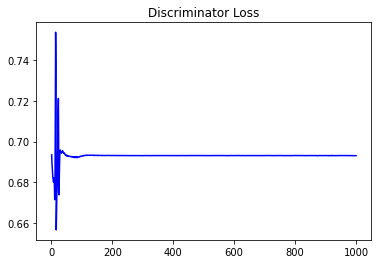

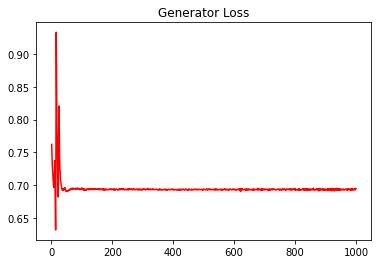

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07026271658152261


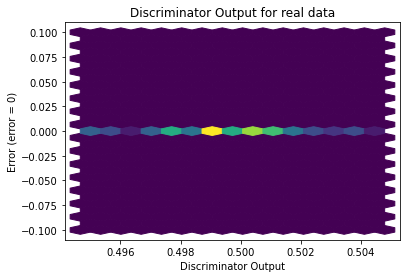

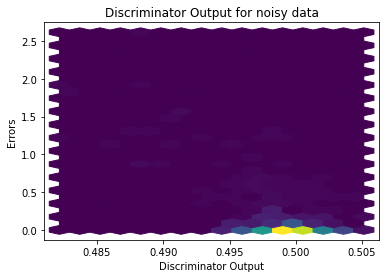

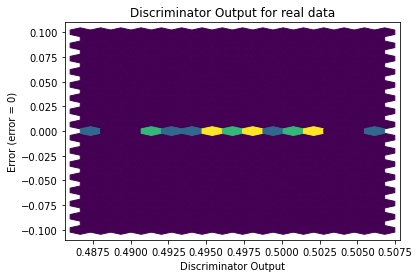

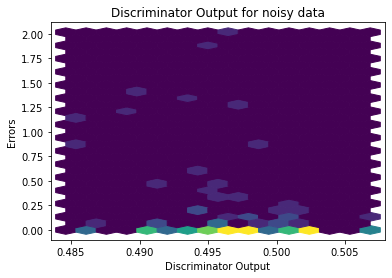

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


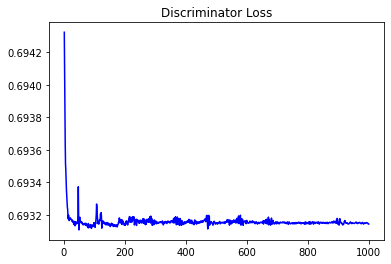

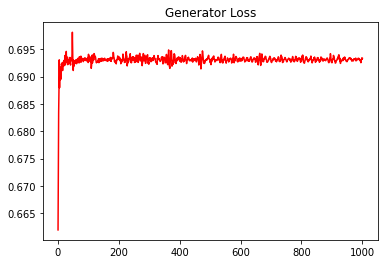

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0706822316177202


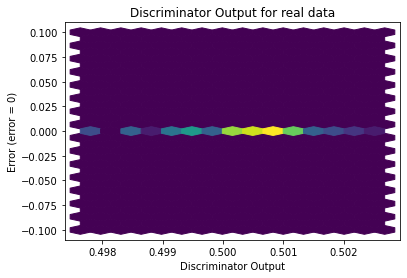

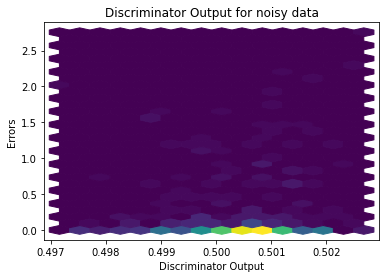

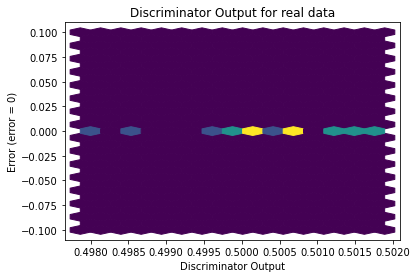

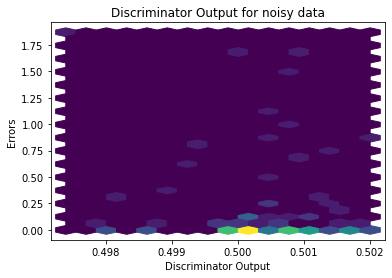

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0270]], requires_grad=True)
